# **第8章: ニューラルネット**
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ．

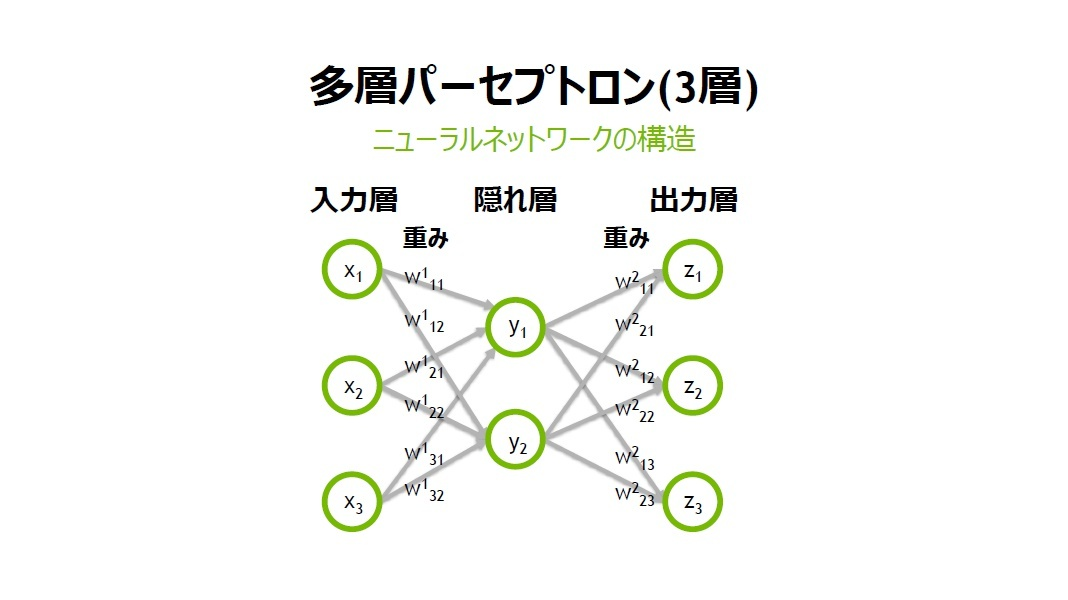

# 70. 単語ベクトルの和による特徴量
問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例$x_i$の特徴ベクトル$\boldsymbol{x}_i$を並べた行列$X$と，正解ラベルを並べた行列（ベクトル）$Y$を作成したい．

\
$$
X = \begin{pmatrix} 
  \boldsymbol{x}_1 \\ 
  \boldsymbol{x}_2 \\ 
  \dots \\ 
  \boldsymbol{x}_n \\ 
\end{pmatrix} \in \mathbb{R}^{n \times d},
Y = \begin{pmatrix} 
  y_1 \\ 
  y_2 \\ 
  \dots \\ 
  y_n \\ 
\end{pmatrix} \in \mathbb{N}^{n}
$$
\
ここで，$n$は学習データの事例数であり，$\boldsymbol{x}_i \in \mathbb{R}^d$と$y_i \in \mathbb{N}$はそれぞれ，$i \in \{1, \dots, n\}$番目の事例の特徴量ベクトルと正解ラベルを表す． なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．$\mathbb{N}_{<4}$で4未満の自然数（0を含む）を表すことにすれば，任意の事例の正解ラベル$y_i$は$y_i \in \mathbb{N}_{<4}$で表現できる． 以降では，ラベルの種類数を$L$で表す（今回の分類タスクでは$L=4$である）．

$i$番目の事例の特徴ベクトル$\boldsymbol x_i$は，次式で求める．

\
$$
\boldsymbol{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} \mathrm{emb}(w_{i,t})
$$
\
ここで，$i$番目の事例は$T_i$個の（記事見出しの）単語列$(w_{i,1}, w_{i,2}, \dots, w_{i,T_i})$から構成され，$\mathrm{emb}(w) \in \mathbb{R}^d$は単語$w$に対応する単語ベクトル（次元数は$d$）である．すなわち，$i$番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものが$\boldsymbol x_i$である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．300次元の単語ベクトルを用いたので，$d=300$である．

$i$番目の事例のラベル$y_i$は，次のように定義する．

\
$$
y_i = \begin{cases}
0 & (\mbox{記事}x_i\mbox{が「ビジネス」カテゴリの場合}) \\
1 & (\mbox{記事}x_i\mbox{が「科学技術」カテゴリの場合}) \\
2 & (\mbox{記事}x_i\mbox{が「エンターテイメント」カテゴリの場合}) \\
3 & (\mbox{記事}x_i\mbox{が「健康」カテゴリの場合}) \\
\end{cases}
$$
\
なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．

以上の仕様に基づき，以下の行列・ベクトルを作成し，ファイルに保存せよ．

\
*  学習データの特徴量行列: $X_{\rm train} \in \mathbb{R}^{N_t \times d}$
*  学習データのラベルベクトル: $Y_{\rm train} \in \mathbb{N}^{N_t}$
*  検証データの特徴量行列: $X_{\rm valid} \in \mathbb{R}^{N_v \times d}$
*  検証データのラベルベクトル: $Y_{\rm valid} \in \mathbb{N}^{N_v}$
*  評価データの特徴量行列: $X_{\rm test} \in \mathbb{R}^{N_e \times d}$
*  評価データのラベルベクトル: $Y_{\rm test} \in \mathbb{N}^{N_e}$

\
なお，$N_t,N_v,N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

---



**第6章**問題50と同じ処理を実行

In [ ]:
# データのダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2023-01-20 05:59:25--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  25.3MB/s    in 1.1s    

2023-01-20 05:59:27 (25.3 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#データの読み込み
df = pd.read_csv('newsCorpora.csv', sep = '\t', header = None, names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

#データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']]

#データの分割(学習，検証，評価データが80％，10％，10％になるように)
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=123, stratify=df['CATEGORY'])
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=123, stratify=valid_test['CATEGORY'])


# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4502
e    4223
t    1219
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    562
e    528
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    528
t    152
m     91
Name: CATEGORY, dtype: int64


第7章問題60で利用した学習済み単語ベクトルをダウンロードする

In [ ]:
import gdown

url = 'https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
output = 'GoogleNews-vectors-negative300.bin.gz'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=pbef&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:06<00:00, 248MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
from gensim.models import KeyedVectors
#ダウンロードしたファイルをロード
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

特徴ベクトルとラベルベクトルを作成し，保存する．PyTorchによるニューラルネットのインプットとして利用するため，Tensor型に変換する．



In [ ]:
import string
import torch

def transform_w2v(text):
  table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  words = text.translate(table).split()  # 記号をスペースに置換後、スペースで分割してリスト化
  vec = [model[word] for word in words if word in model]  # 1語ずつベクトル化

  return torch.tensor(sum(vec) / len(vec))  # 平均ベクトルをTensor型に変換して出力

str.maketrans()：
> str.translate()に使用できる変換テーブルを返す．\
str.maketrans(置き換え元の文字列, 置き換え先の文字列)というようにして使用．\
引数を 2 つ指定する場合、それらは同じ長さの文字列である必要がある．

string.punctuation:
> 記号の文字列を表す定数\
!"#$%&'()*+,-./:;<=>?@[]^_`{|}~

.translate():
> 変換テーブルを使って文字列を変換する関数\
文字列.translate(置換テーブル)

torch.tensor():
> PyTorchライブラリにおけるテンソル（多次元配列）を生成するための関数\
torch.tensor(リストや配列などのデータ, dtype=None, device=None, requires_grad=False)\
numpyのndarray型と似ており,ベクトル表現から行列表現,それらの演算といった機能が提供されている.ndarray型との違いはGPUによる高速化ができる点と自動微分(Autograd)機能により勾配演算を自動化できる点．


In [ ]:
# 特徴ベクトルの作成
X_train = torch.stack([transform_w2v(text) for text in train['TITLE']])
X_valid = torch.stack([transform_w2v(text) for text in valid['TITLE']])
X_test = torch.stack([transform_w2v(text) for text in test['TITLE']])

print(X_train.size())
print(X_train)

torch.Size([10672, 300])
tensor([[-0.0170,  0.1318, -0.0728,  ...,  0.0395,  0.0223,  0.0184],
        [-0.1119, -0.0523, -0.1002,  ...,  0.0319, -0.0237, -0.0425],
        [-0.0636, -0.0228, -0.0005,  ..., -0.0280,  0.1057,  0.0396],
        ...,
        [ 0.0301, -0.0355, -0.0082,  ..., -0.0045,  0.0606, -0.0281],
        [ 0.0002,  0.0442, -0.0424,  ..., -0.0507,  0.0283,  0.0365],
        [ 0.0242,  0.0418,  0.1211,  ..., -0.0564,  0.0144,  0.0277]])


torch.stack:
> PyTorchにおいて、複数のテンソルを結合して新しいテンソルを生成するための関数\
sequenceには、結合するテンソルのリストやタプルを指定.\
dimには、結合する次元を指定.\
outには、結合した結果を格納するテンソルを指定.

In [ ]:
# ラベルベクトルの作成
category_dict = {'b': 0, 't': 1, 'e':2, 'm':3}  #4つのカテゴリーに対して0,1,2,3を割り当てるための辞書
y_train = torch.tensor(train['CATEGORY'].map(lambda x: category_dict[x]).values)
y_valid = torch.tensor(valid['CATEGORY'].map(lambda x: category_dict[x]).values)
y_test = torch.tensor(test['CATEGORY'].map(lambda x: category_dict[x]).values)

print(y_train.size())
print(y_train)

torch.Size([10672])
tensor([0, 0, 0,  ..., 0, 2, 2])


.map():
> pandasのSeriesオブジェクトに対して使用するメソッドで、各要素に対して関数を適用する．\
Series.map(関数)

lambda:
> 無名関数\
lambda_引数:処理内容

In [ ]:
# 保存
torch.save(X_train, 'X_train.pt')
torch.save(X_valid, 'X_valid.pt')
torch.save(X_test, 'X_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_valid, 'y_valid.pt')
torch.save(y_test, 'y_test.pt')

# 71. 単層ニューラルネットワークによる予測
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．

\
$$
\hat{y}_1=softmax(x_1W),\\\hat{Y}=softmax(X_{[1:4]}W)
$$
\
ただし，$\rm softmax$はソフトマックス関数，$X_{[1:4]}∈\mathbb{R}^{4×d}$
は特徴ベクトル$x_1,x_2,x_3,x_4$を縦に並べた行列である．

\
$$
X_{[1:4]}=\begin{pmatrix}x_1\\x_2\\x_3\\x_4\end{pmatrix}
$$
\
行列$W \in \mathbb{R}^{d \times L}$
は単層ニューラルネットワークの重み行列で，ここではランダムな値で初期化すればよい（問題73以降で学習して求める）．
なお，$\hat{\boldsymbol y_1} \in \mathbb{R}^L$
は未学習の行列$W$で事例$x_1$
を分類したときに，各カテゴリに属する確率を表すベクトルである． 同様に，$\hat{Y} \in \mathbb{R}^{n \times L}$
は，学習データの事例$x_1,x_2,x_3,x_4$
について，各カテゴリに属する確率を行列として表現している．

---



SNPNetという単層ニューラルネットワークを定義する．__ init__でネットワークを構成するレイヤーを定義し、forwardメソッドでインプットデータが順伝播時に通るレイヤーを順に配置する．

In [ ]:
from torch import nn

class SLPNet(nn.Module):    #nn.Moduleを継承してSLPNetという単層ニューラルネットワークを定義する．
  def __init__(self, input_size, output_size):
    super().__init__()      ## 基底クラスのコンストラクタをオーバーライド
    self.fc = nn.Linear(input_size, output_size, bias=False)       #全結合層を定義
    nn.init.normal_(self.fc.weight, 0.0, 1.0)  # 正規乱数で重みを初期化（平均0，標準偏差１の正規分布）

  #順伝搬
  def forward(self, x):
    x = self.fc(x)
    return x

指示された計算を実行

ソフトマックス関数：
> 複数の出力値の合計が1.0（＝100％）になるように変換して出力する関数\
値の大小を強調できる．\
主に分類問題における出力層の活性化関数として用いられる．\
dim=-1 は、最後の次元に対してソフトマックス関数を適用することを指定
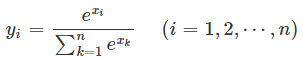

In [ ]:
model = SLPNet(300, 4)  # 単層ニューラルネットワークの初期化
y_hat_1 = torch.softmax(model(X_train[:1]), dim=-1)
print(y_hat_1)

tensor([[0.2749, 0.3346, 0.1228, 0.2677]], grad_fn=<SoftmaxBackward0>)


In [ ]:
print(torch.softmax(model(X_train[:1])))

TypeError: ignored

In [ ]:
print(model(X_train[:10]).shape)

torch.Size([10, 4])


In [ ]:
Y_hat = torch.softmax(model.forward(X_train[:4]), dim=-1)
print(Y_hat)

tensor([[0.2749, 0.3346, 0.1228, 0.2677],
        [0.0223, 0.6459, 0.2411, 0.0907],
        [0.1428, 0.5951, 0.1365, 0.1256],
        [0.0678, 0.3883, 0.1470, 0.3968]], grad_fn=<SoftmaxBackward0>)


# 72. 損失と勾配の計算
学習データの事例x1と事例集合$x_1,x_2,x_3,x_4$に対して，クロスエントロピー損失と，行列$W$に対する勾配を計算せよ．なお，ある事例$x_i$に対して損失は次式で計算される．

\
$$
l_i=−log[事例x_iがy_iに分類される確率]
$$
\
ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

---



nnパッケージのCrossEntropyLossを利用する．モデルの出力ベクトルとラベルベクトルを入力することで、上式の平均損失を計算することができる．損失関数内でソフトマックス関数の処理をしたことになっているので、ロスを計算する際はニューラルネットワークの最後にソフトマックス関数を適用する必要はない．

In [ ]:
# 損失関数の定義
criterion = nn.CrossEntropyLoss()

In [ ]:
l_1 = criterion(model(X_train[:1]), y_train[:1])  # 入力ベクトルはsoftmax前の値
model.zero_grad()  # 勾配をゼロで初期化
l_1.backward()  # 勾配を計算
print(f'損失: {l_1:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')   #行列 W に対する勾配

損失: 1.2913
勾配:
tensor([[ 0.0123, -0.0955,  0.0528,  ..., -0.0286, -0.0162, -0.0133],
        [-0.0057,  0.0441, -0.0243,  ...,  0.0132,  0.0075,  0.0061],
        [-0.0021,  0.0162, -0.0089,  ...,  0.0048,  0.0027,  0.0023],
        [-0.0045,  0.0353, -0.0195,  ...,  0.0106,  0.0060,  0.0049]])


In [ ]:
l = criterion(model(X_train[:4]), y_train[:4])
model.zero_grad()
l.backward()
print(f'損失: {l:.4f}')
print(f'勾配:\n{model.fc.weight.grad}')

損失: 2.4328
勾配:
tensor([[ 0.0505, -0.0409,  0.0392,  ..., -0.0096, -0.0185, -0.0024],
        [-0.0316,  0.0136, -0.0229,  ...,  0.0046,  0.0128,  0.0010],
        [-0.0105,  0.0056, -0.0085,  ...,  0.0023,  0.0025, -0.0005],
        [-0.0084,  0.0217, -0.0078,  ...,  0.0027,  0.0033,  0.0019]])


# 73. 確率的勾配降下法による学習
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列$W$ を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など）．

---



勾配降下法（Gradient Descent）は機械学習や deep learningなどの様々なアルゴリズムで使用される最適化手法の1つ．
その目的は、複雑な関数の最小値を見つけることである．

そのアルゴリズムは、以下の手順で実行される．
1.  初期値を選ぶ．
2.  関数の勾配を求める．
3.  勾配が指す方向に，少しずつ移動する．
4.  2~3を繰り返し、収束するまで繰り返す．

勾配降下法は，局所最適解に陥らないため，全体最適解を見つけることができる．ただし，計算コストが高く，収束するまでに時間がかかることがある．
また，学習率（step size）を適切に設定することが重要で，大きすぎると収束しない，小さすぎると収束するまでに時間がかかるなどの問題が生じる．

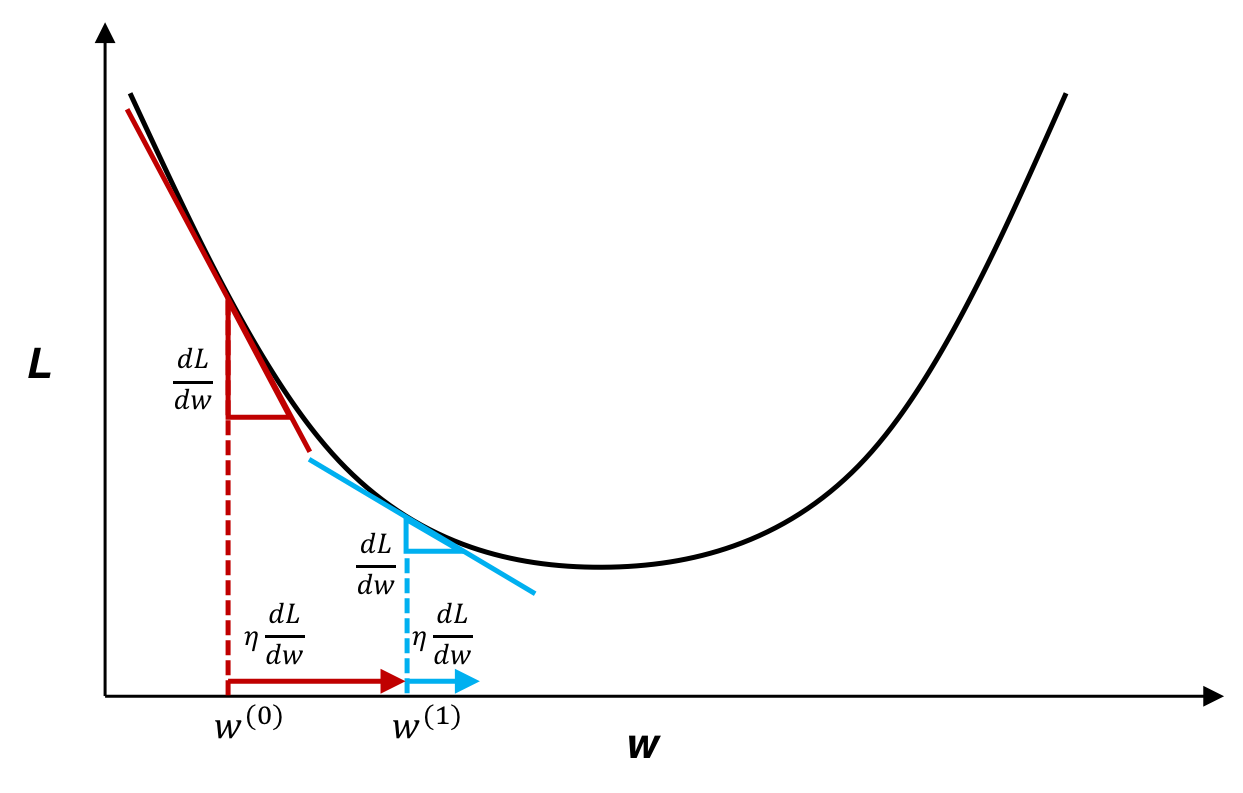


確率的勾配降下法はデータを全て使って更新するのではなく，ランダムなサンプルを使って更新するため，確率的に更新される．そのため，大量のデータを扱う場合には高速に収束することが期待される．
ただし，確率的に更新されるため，収束するまでに時間がかかることがあり，局所最適解に陥る可能性もある．


学習に当たり，DatasetとDataloaderを準備する．Datasetは特徴ベクトルとラベルベクトルを合わせて保持することができる型で，以下のクラスを用いてもとのTensorを変換する．


In [ ]:
from torch.utils.data import Dataset

class NewsDataset(Dataset):   #Datasetクラスを継承したNewsDatasetクラスを定義
  def __init__(self, X, y):  # datasetの構成要素を指定
    self.X = X
    self.y = y

  def __len__(self):  # len(dataset)で返す値を指定
    return len(self.y)

  def __getitem__(self, idx):  # dataset[idx]で返す値を指定
    return [self.X[idx], self.y[idx]]

Datasetに変換後，Dataloaderを作成する．DataloaderはDatasetを入力とし，指定したサイズ(batch_size)にまとめたデータを順に取り出すことができる．\
batch_size=1とした場合、1つずつデータを取り出すDataloaderを作成することを意味する．\
shuffleをTrueとするとランダムにデータを取り出せる．

In [ ]:
from torch.utils.data import DataLoader

# Datasetの作成
dataset_train = NewsDataset(X_train, y_train)
dataset_valid = NewsDataset(X_valid, y_valid)
dataset_test = NewsDataset(X_test, y_test)

# Dataloaderの作成
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)
dataloader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)

データの準備ができたので，行列Wを学習する．\
計算した勾配から重みを更新するため，オプティマイザも定義する，ここでは指示に従いSGDをセットする．\
オプティマイザは最適化手法の1つで，ニューラルネットワークのパラメータを最適化するために用いる．そのアルゴリズムは、以下の手順で実行される．


1.   ニューラルネットワークのパラメータを初期化．
2.   ニューラルネットワークの出力と正解との誤差を計算．
3.   誤差を小さくするために、パラメータを更新．
4.   2~3を繰り返し、収束するまで繰り返す．






In [ ]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)    #lrは学習率

# 学習
num_epochs = 10
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  loss_train = 0.0
  for i, (inputs, labels) in enumerate(dataloader_train):
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)   #順伝播
    loss = criterion(outputs, labels)   #誤差を計算
    loss.backward()   #誤差を逆伝播
    optimizer.step()    #パラメータを更新

    # 損失を記録
    loss_train += loss.item()
 
  # バッチ単位の平均損失計算
  loss_train = loss_train / i

  # 検証データの損失計算
  model.eval()  #推論モード
  with torch.no_grad():   #勾配計算を無効にする
    inputs, labels = next(iter(dataloader_valid))
    outputs = model(inputs)
    loss_valid = criterion(outputs, labels)

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, loss_valid: {loss_valid:.4f}')  

epoch: 1, loss_train: 0.4992, loss_valid: 0.3609
epoch: 2, loss_train: 0.3234, loss_valid: 0.3148
epoch: 3, loss_train: 0.2916, loss_valid: 0.2944
epoch: 4, loss_train: 0.2745, loss_valid: 0.2838
epoch: 5, loss_train: 0.2638, loss_valid: 0.2789
epoch: 6, loss_train: 0.2555, loss_valid: 0.2774
epoch: 7, loss_train: 0.2507, loss_valid: 0.2725
epoch: 8, loss_train: 0.2458, loss_valid: 0.2749
epoch: 9, loss_train: 0.2429, loss_valid: 0.2684
epoch: 10, loss_train: 0.2402, loss_valid: 0.2687


逆伝播を行うには，途中の出力値を記録しておく必要があり，その分のメモリが必要になる．Pytorchでは，演算の入力のテンソルのTensor.requires_grad属性がTrueの場合のみ，演算の出力のテンソルの値が記録されるようになっている．

# 74. 正解率の計測
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ．

---



学習したモデルとDataloaderを入力として，正解率を算出する関数を定義する．

In [ ]:
def calculate_accuracy(model, loader):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)  #出力ラベルを求める
      total += len(inputs)
      correct += (pred == labels).sum().item()  #予測が正しいかどうかを判定し、その結果をカウント
      
  return correct / total

torch.argmax():
> torch.argmax()の引数にTenasor配列を指定すると最大値のインデックスが返ってくる。多次元配列の場合は、平坦化（torch.flatten()）された配列のインデックスが返ってくる。

torch.item():
> PyTorchテンソルtorch.Tensorの要素をPython組み込み型（intやfloat）の値として取得するにはitem()メソッドを使う

In [ ]:
acc_train = calculate_accuracy(model, dataloader_train)
acc_test = calculate_accuracy(model, dataloader_test)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.920
正解率（評価データ）：0.906


# 75. 損失と正解率のプロット
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

問題74の関数を損失も計算できるように改変し，エポック毎に適用することで損失と正解率を記録する．

In [ ]:
def calculate_loss_and_accuracy(model, criterion, loader):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total

In [ ]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 30
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
 
  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 0.3357, accuracy_train: 0.8847, loss_valid: 0.3626, accuracy_valid: 0.8726
epoch: 2, loss_train: 0.2945, accuracy_train: 0.8979, loss_valid: 0.3217, accuracy_valid: 0.8831
epoch: 3, loss_train: 0.2684, accuracy_train: 0.9072, loss_valid: 0.2983, accuracy_valid: 0.8928
epoch: 4, loss_train: 0.2590, accuracy_train: 0.9131, loss_valid: 0.2916, accuracy_valid: 0.8958
epoch: 5, loss_train: 0.2491, accuracy_train: 0.9151, loss_valid: 0.2832, accuracy_valid: 0.9003
epoch: 6, loss_train: 0.2454, accuracy_train: 0.9182, loss_valid: 0.2814, accuracy_valid: 0.9025
epoch: 7, loss_train: 0.2396, accuracy_train: 0.9192, loss_valid: 0.2785, accuracy_valid: 0.8996
epoch: 8, loss_train: 0.2376, accuracy_train: 0.9209, loss_valid: 0.2783, accuracy_valid: 0.8981
epoch: 9, loss_train: 0.2319, accuracy_train: 0.9201, loss_valid: 0.2724, accuracy_valid: 0.9078
epoch: 10, loss_train: 0.2298, accuracy_train: 0.9212, loss_valid: 0.2723, accuracy_valid: 0.9070
epoch: 11, loss_train: 0.2289

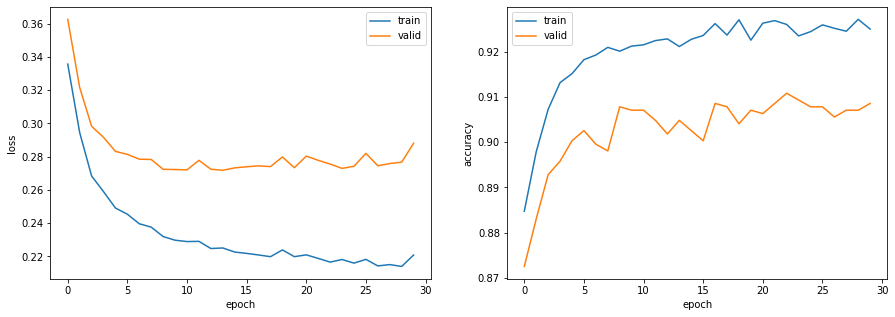

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# 視覚化
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log_train).T[0], label='train')
ax[0].plot(np.array(log_valid).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log_train).T[1], label='train')
ax[1].plot(np.array(log_valid).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

# 76. チェックポイント
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

---



学習途中のパラメータはmodel.state_dict()，最適化アルゴリズムの内部状態はoptimizer.state_dict()でアクセス可能なので，各エポックでエポック数と合わせて保存する処理を追加する．

In [ ]:
# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# 学習
num_epochs = 10
log_train = []
log_valid = []
for epoch in range(num_epochs):
  # 訓練モードに設定
  model.train()
  for inputs, labels in dataloader_train:
    # 勾配をゼロで初期化
    optimizer.zero_grad()

    # 順伝播 + 誤差逆伝播 + 重み更新
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
 
  # 損失と正解率の算出
  loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
  loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
  log_train.append([loss_train, acc_train])
  log_valid.append([loss_valid, acc_valid])

  # チェックポイントの保存
  torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

  # ログを出力
  print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}')  

epoch: 1, loss_train: 0.3326, accuracy_train: 0.8838, loss_valid: 0.3453, accuracy_valid: 0.8771
epoch: 2, loss_train: 0.2915, accuracy_train: 0.9016, loss_valid: 0.3083, accuracy_valid: 0.8913
epoch: 3, loss_train: 0.2823, accuracy_train: 0.8998, loss_valid: 0.2982, accuracy_valid: 0.8891
epoch: 4, loss_train: 0.2597, accuracy_train: 0.9123, loss_valid: 0.2809, accuracy_valid: 0.8958
epoch: 5, loss_train: 0.2517, accuracy_train: 0.9145, loss_valid: 0.2766, accuracy_valid: 0.8996
epoch: 6, loss_train: 0.2446, accuracy_train: 0.9171, loss_valid: 0.2713, accuracy_valid: 0.9003
epoch: 7, loss_train: 0.2414, accuracy_train: 0.9201, loss_valid: 0.2705, accuracy_valid: 0.9025
epoch: 8, loss_train: 0.2386, accuracy_train: 0.9198, loss_valid: 0.2695, accuracy_valid: 0.9063
epoch: 9, loss_train: 0.2333, accuracy_train: 0.9212, loss_valid: 0.2671, accuracy_valid: 0.9048
epoch: 10, loss_train: 0.2332, accuracy_train: 0.9199, loss_valid: 0.2674, accuracy_valid: 0.9018


# 77. ミニバッチ化
問題76のコードを改変し，$B$事例ごとに損失・勾配を計算し，行列$W$の値を更新せよ（ミニバッチ化）．$B$の値を$1,2,4,8,…$と変化させながら，1エポックの学習に要する時間を比較せよ．

---



Dataloaderの作成以降の処理をtrain_modelとして関数化し、バッチサイズを含むいくつかのパラメータを引数として設定する．

In [ ]:
import time

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs):
  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)   #引数によってバッチサイズを変更可能
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
  
    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

バッチサイズを変化させながら，処理時間を比較する．

In [ ]:
# datasetの作成
dataset_train = NewsDataset(X_train, y_train)
dataset_valid = NewsDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1)

バッチサイズ: 1
epoch: 1, loss_train: 0.3287, accuracy_train: 0.8869, loss_valid: 0.3536, accuracy_valid: 0.8688, 4.9125sec
バッチサイズ: 2
epoch: 1, loss_train: 0.3018, accuracy_train: 0.8941, loss_valid: 0.3261, accuracy_valid: 0.8816, 2.1600sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2923, accuracy_train: 0.8989, loss_valid: 0.3174, accuracy_valid: 0.8838, 1.1074sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2884, accuracy_train: 0.9010, loss_valid: 0.3135, accuracy_valid: 0.8891, 0.5997sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2866, accuracy_train: 0.9014, loss_valid: 0.3119, accuracy_valid: 0.8883, 0.4136sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2857, accuracy_train: 0.9012, loss_valid: 0.3112, accuracy_valid: 0.8883, 0.2507sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2854, accuracy_train: 0.9014, loss_valid: 0.3108, accuracy_valid: 0.8891, 0.2527sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2848, accuracy_train: 0.9014, loss_valid: 0.3106, accuracy_valid: 0.8891, 0.1342sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2847, accuracy_

# 78. GPU上での学習
問題77のコードを改変し，GPU上で学習を実行せよ．

GPUを指定する引数deviceをcalculate_loss_and_accuracy、train_modelに追加する． それぞれの関数内で，モデルおよび入力TensorをGPUに送る処理を追加し，deviceにcudaを指定すればGPUを使用することができる．

In [ ]:
def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)    #既存のtorch.Tensorのデバイス（GPU / CPU）を切り替える（転送する）
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total
  

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
    
    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

  return {'train': log_train, 'valid': log_valid}

In [ ]:
# datasetの作成
dataset_train = NewsDataset(X_train, y_train)
dataset_valid = NewsDataset(X_valid, y_valid)

# モデルの定義
model = SLPNet(300, 4)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
for batch_size in [2 ** i for i in range(11)]:
  print(f'バッチサイズ: {batch_size}')
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, 1, device=device)

バッチサイズ: 1
epoch: 1, loss_train: 0.3317, accuracy_train: 0.8874, loss_valid: 0.3636, accuracy_valid: 0.8681, 11.9725sec
バッチサイズ: 2
epoch: 1, loss_train: 0.3058, accuracy_train: 0.8956, loss_valid: 0.3346, accuracy_valid: 0.8801, 4.8523sec
バッチサイズ: 4
epoch: 1, loss_train: 0.2967, accuracy_train: 0.8999, loss_valid: 0.3253, accuracy_valid: 0.8816, 2.4948sec
バッチサイズ: 8
epoch: 1, loss_train: 0.2925, accuracy_train: 0.8997, loss_valid: 0.3231, accuracy_valid: 0.8823, 1.3129sec
バッチサイズ: 16
epoch: 1, loss_train: 0.2902, accuracy_train: 0.9014, loss_valid: 0.3196, accuracy_valid: 0.8853, 0.7105sec
バッチサイズ: 32
epoch: 1, loss_train: 0.2896, accuracy_train: 0.9011, loss_valid: 0.3189, accuracy_valid: 0.8861, 0.4352sec
バッチサイズ: 64
epoch: 1, loss_train: 0.2888, accuracy_train: 0.9009, loss_valid: 0.3185, accuracy_valid: 0.8868, 0.2690sec
バッチサイズ: 128
epoch: 1, loss_train: 0.2877, accuracy_train: 0.9008, loss_valid: 0.3183, accuracy_valid: 0.8868, 0.1781sec
バッチサイズ: 256
epoch: 1, loss_train: 0.2888, accuracy

# 79. 多層ニューラルネットワーク
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．

---



多層ニューラルネットワークMLPを新たに定義する．このネットワークは入力層->中間層->出力層の構成とし，中間層の後にバッチノーマライゼーションを行う．\
train_modelでは新たに学習の打ち切り基準を導入する．検証データの損失が3エポック連続で低下しなかった場合に打ち切るルールとする．\
学習率を徐々に下げるスケジューラも追加し，汎用性脳の向上を目指す．

バッチノーマライゼーション：
> ミニバッチの同じチャンネル毎に、平均０分散1になるよう正規化を行うこと．結果，出力が適度に分散され，勾配消失などの問題が起こりにくくなる．

ReLU 活性化関数：
> 出力値が常に0、入力値が0より上の場合には出力値が入力値と同じ値となる関数\
「勾配消失問題の解消」というメリットがある．


In [ ]:
from torch.nn import functional as F

class MLPNet(nn.Module):
  def __init__(self, input_size, mid_size, output_size, mid_layers):
    super().__init__()
    self.mid_layers = mid_layers    #中間層の数
    self.fc = nn.Linear(input_size, mid_size)
    self.fc_mid = nn.Linear(mid_size, mid_size)
    self.fc_out = nn.Linear(mid_size, output_size) 
    self.bn = nn.BatchNorm1d(mid_size) #バッチノーマライゼーションを行うBatchNorm1d層を定義

  def forward(self, x):
    x = F.relu(self.fc(x))    #Linear層で変換された入力 x を ReLU 活性化関数にかける
    for _ in range(self.mid_layers):
      x = F.relu(self.bn(self.fc_mid(x)))
    x = F.relu(self.fc_out(x))
 
    return x

学習率スケジューラー：
> 学習が進むにつれて学習率を変化させることで，学習効率を向上させる．

optim.lr_scheduler.CosineAnnealingLR():
> 予言関数を使って学習率をスケジューリングする．\
引数として，オプティマイザー，学習のエポック数，最小の学習率，最後に利用したエポック番号をとる．\
学習が進むにつれて学習率を余弦開放的に減少させ，最終的に最小の学習率に達するようにスケジューリングする．

In [ ]:
from torch import optim

def calculate_loss_and_accuracy(model, criterion, loader, device):
  model.eval()
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return loss / len(loader), correct / total
  

def train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, num_epochs, device=None):
  # GPUに送る
  model.to(device)

  # dataloaderの作成
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
  dataloader_valid = DataLoader(dataset_valid, batch_size=len(dataset_valid), shuffle=False)

  # スケジューラの設定
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=1e-5, last_epoch=-1)

  # 学習
  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    # 開始時刻の記録
    s_time = time.time()

    # 訓練モードに設定
    model.train()
    for inputs, labels in dataloader_train:
      # 勾配をゼロで初期化
      optimizer.zero_grad()

      # 順伝播 + 誤差逆伝播 + 重み更新
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model.forward(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
    
    # 損失と正解率の算出
    loss_train, acc_train = calculate_loss_and_accuracy(model, criterion, dataloader_train, device)
    loss_valid, acc_valid = calculate_loss_and_accuracy(model, criterion, dataloader_valid, device)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])

    # チェックポイントの保存
    torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(), 'optimizer_state_dict': optimizer.state_dict()}, f'checkpoint{epoch + 1}.pt')

    # 終了時刻の記録
    e_time = time.time()

    # ログを出力
    print(f'epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec') 

    # 検証データの損失が3エポック連続で低下しなかった場合は学習終了
    if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      break

    # スケジューラを1ステップ進める
    scheduler.step()

  return {'train': log_train, 'valid': log_valid}

In [ ]:
# datasetの作成
dataset_train = NewsDataset(X_train, y_train)
dataset_valid = NewsDataset(X_valid, y_valid)

# モデルの定義
model = MLPNet(300, 200, 4, 1)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
log = train_model(dataset_train, dataset_valid, 64, model, criterion, optimizer, 1000, device)

epoch: 1, loss_train: 0.9507, accuracy_train: 0.7351, loss_valid: 0.9459, accuracy_valid: 0.7361, 0.4575sec
epoch: 2, loss_train: 0.7479, accuracy_train: 0.7640, loss_valid: 0.7530, accuracy_valid: 0.7609, 0.4289sec
epoch: 3, loss_train: 0.6613, accuracy_train: 0.7744, loss_valid: 0.6711, accuracy_valid: 0.7654, 0.4406sec
epoch: 4, loss_train: 0.6161, accuracy_train: 0.7824, loss_valid: 0.6284, accuracy_valid: 0.7744, 0.4271sec
epoch: 5, loss_train: 0.5757, accuracy_train: 0.7927, loss_valid: 0.5895, accuracy_valid: 0.7879, 0.4306sec
epoch: 6, loss_train: 0.5468, accuracy_train: 0.8063, loss_valid: 0.5625, accuracy_valid: 0.8036, 0.4287sec
epoch: 7, loss_train: 0.5193, accuracy_train: 0.8192, loss_valid: 0.5363, accuracy_valid: 0.8103, 0.4175sec
epoch: 8, loss_train: 0.4973, accuracy_train: 0.8258, loss_valid: 0.5154, accuracy_valid: 0.8111, 0.4575sec
epoch: 9, loss_train: 0.4781, accuracy_train: 0.8341, loss_valid: 0.4968, accuracy_valid: 0.8208, 0.4271sec
epoch: 10, loss_train: 0.450

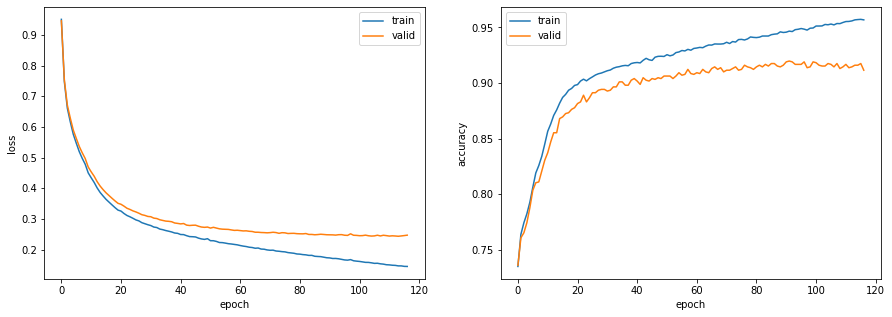

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log['train']).T[0], label='train')
ax[0].plot(np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train')
ax[1].plot(np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [ ]:
def calculate_accuracy(model, loader, device):
  model.eval()
  total = 0
  correct = 0
  with torch.no_grad():
    for inputs, labels in loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs = model(inputs)
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
      
  return correct / total

In [ ]:
# 正解率の確認
acc_train = calculate_accuracy(model, dataloader_train, device)
acc_test = calculate_accuracy(model, dataloader_test, device)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')

正解率（学習データ）：0.957
正解率（評価データ）：0.911
